In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pratyushpuri_ai_vs_human_content_detection_1000_record_in_2025_path = kagglehub.dataset_download('pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025')

print('Data source import complete.')

Using Colab cache for faster access to the 'ai-vs-human-content-detection-1000-record-in-2025' dataset.
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Just error check (work-in-progress)
#import os, pandas as pd
#if os.path.exists("/kaggle/input"):
#  data_path = "/kaggle/input/ai-vs-human-content-detection-1000-record-in-2025"
#else:
#  import kagglehub
#  data_path = kagglehub.dataset_download('pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025')
#  print("Dataset path:", data_path)
#df = pd.read_csv(os.path.join(data_path, "ai-vs-human-content-detection-1000-record-in-2025"))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-vs-human-content-detection-1000-record-in-2025/ai_human_content_detection_dataset.csv


In [5]:
# Ashwin Vinod
# fixed preprocessing for split datasets
def one_hot_encode(df, column):
  unique = df[column].unique() # find all unique values in the dataset
  unique.sort() # sort them
  index = df.columns.get_loc(column) # get the index of the column

  for val in unique: # loop through the unique values
    name = column + "_" + str(val) # append column and _val
    df.insert(index, name, 0) # insert it
    #df.insert(index,name,(df[column] == val).astype(int))
    df.loc[df[column] == val, name] = 1 # boolean mask to set the column value to 1 where applicable
    index += 1

  return df.drop(column, axis=1) # drop the original column

def min_max(series):
  return (series - series.min()) / (series.max() - series.min())

def z_score(series):
  return (series - series.mean()) / series.std()

# Logan Caraway
# preprocessing for non-text data
# irrelevant for now since we are not only using text content
def preprocess(df):
  counts = ['word_count', 'character_count', 'sentence_count', 'grammar_errors']
  bounded = ['lexical_diversity', 'passive_voice_ratio', 'punctuation_ratio', 'burstiness', 'sentiment_score']
  continuous = ['flesch_reading_ease', 'gunning_fog_index', 'predictability_score', 'avg_sentence_length', 'avg_word_length']

  # special cases

  if 'sentiment_score' in df.columns:
    df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')
    df['sentiment_score'] = df['sentiment_score'].fillna(0)

  if 'grammar_errors' in df.columns:
    df['grammar_errors'] = pd.to_numeric(df['grammar_errors'], errors='coerce')
    df['grammar_errors'] = df['grammar_errors'].fillna(0)

  if 'burstiness' in df.columns:
    df['burstiness'] = pd.to_numeric(df['burstiness'], errors='coerce')
    df['burstiness'] = df['burstiness'].fillna(df['burstiness'].median())

  for col in counts:
    if col in df.columns:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[col] = df[col].fillna(df[col].median())
      df[col] = np.log1p(df[col])
      df[col] = z_score(df[col])

  for col in bounded:
    if col in df.columns:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[col] = df[col].fillna(df[col].mean())
      df[col] = min_max(df[col])

  for col in continuous:
    if col in df.columns:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[col] = df[col].fillna(df[col].mean())
      df[col] = z_score(df[col])

  df = one_hot_encode(df, "content_type")
  return df

In [6]:
df = pd.read_csv('/kaggle/input/ai-vs-human-content-detection-1000-record-in-2025/ai_human_content_detection_dataset.csv')
df.head()


,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


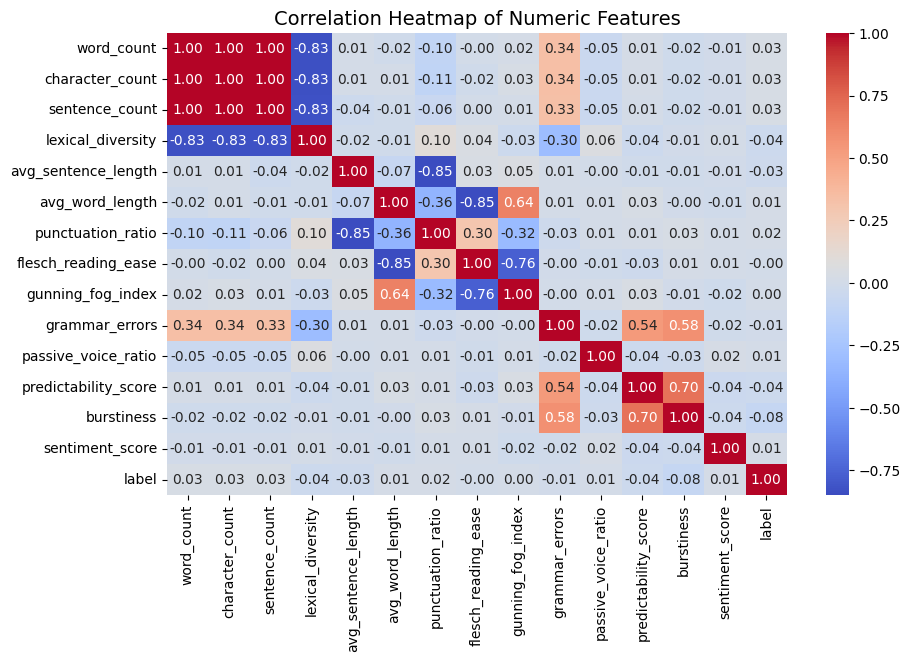

In [7]:
# Ashwin Vinod
# Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.savefig('heatmap.png')
plt.show()

A **Correlation Heatmap** is used to identify patterns and relationships between multiple features. There is a high inverse relation between the word lengths and the flesch reading ease scores.

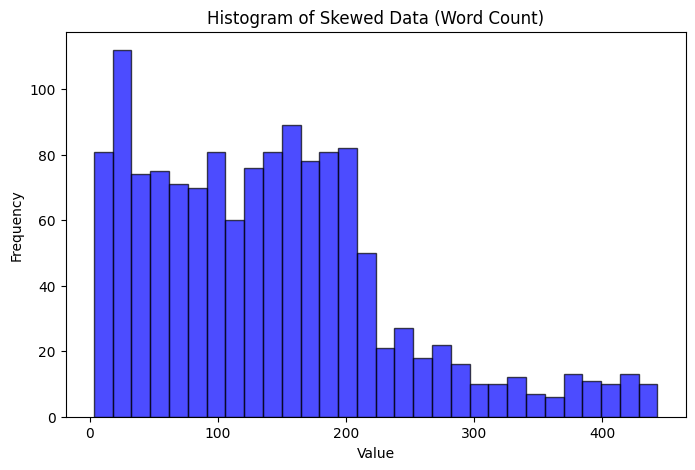

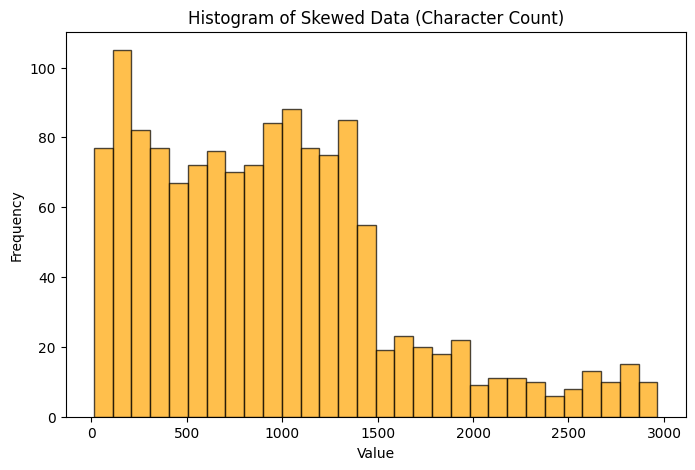

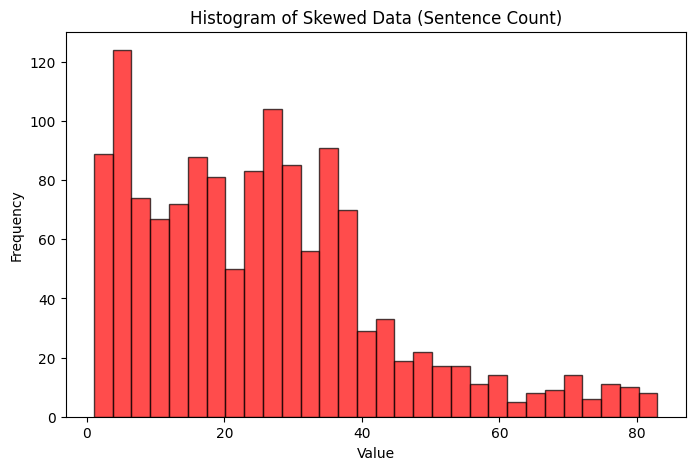

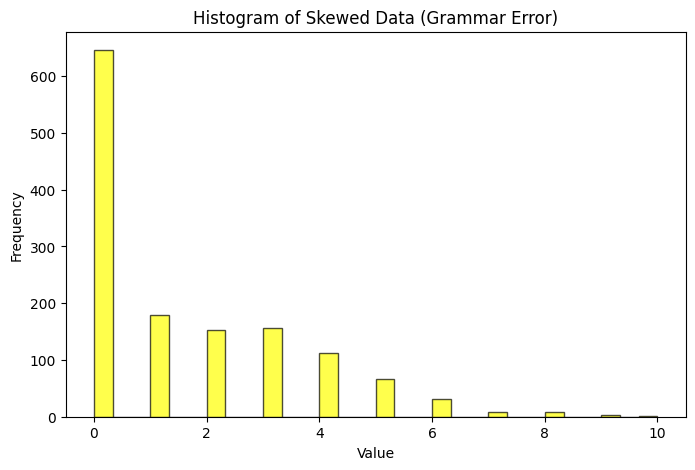

In [8]:
# Logan Caraway
# plotting histograms to show data skew
plt.figure(figsize=(8,5))
plt.hist(df["word_count"], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Skewed Data (Word Count)")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.show()
plt.savefig('word-count-hist.png')

plt.figure(figsize=(8,5))
plt.hist(df["character_count"], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Histogram of Skewed Data (Character Count)")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.show()
plt.savefig('char-count-hist.png')

plt.figure(figsize=(8,5))
plt.hist(df["sentence_count"], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title("Histogram of Skewed Data (Sentence Count)")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.show()
plt.savefig('sent-count-hist.png')

plt.figure(figsize=(8,5))
plt.hist(df["grammar_errors"], bins=30, color='yellow', edgecolor='black', alpha=0.7)
plt.title("Histogram of Skewed Data (Grammar Error)")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.show()
plt.savefig('gram-err-hist.png')


**Histograms** of skewed data is used to find the skewness of the data. The figures showed that the data is positive or right-skewed. It means that most of the data are smaller values and the mean would be greater than the median.

Changed Sentiment_score Nan values to 0 (Neutral)
Changed burstiness (

In [9]:
# Bella
# This code sets up pandas to display all DataFrame columns and includes a note about a future preprocessing step to correctly apply train-set statistics (like mean and median) to both train and test data.

#df = preprocess(df)            #<------------Future Enchancement: Could call preprocess after split to have values updated to mean and median of train values and then for test values
pd.set_option('display.max_columns', None)  #Helps to print all columns instead of ommiting some as "..."
# df.head()

In [10]:
# Bella Matasic
# This code splits a labeled dataset into balanced training and test sets using scikit-learn, separating features (X) from labels (y) and resetting their indices to keep everything aligned and clean for modeling.
from sklearn.model_selection import train_test_split
import pandas as pd

# Features/labels
X = df.drop(columns=['label'])
y = df['label']            # keep as a Series (fine), or y = df['label'].to_numpy()

# Split (note: returns X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep class balance; drop this if you don't want stratification
)

# Ensure aligned, 0..n-1 indices
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

In [11]:
# Alyssa Quijano - helped bella test out other base solutions like logistic regression but it performed worse than code below

# Bella Matasic
# This code builds and trains a text classification pipeline that converts text into TF-IDF features and feeds them into a linear SVM model, then evaluates its accuracy on the test set.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

text_col = "text_content"

# Text-only preprocessing
preprocess = ColumnTransformer(
    [("text", TfidfVectorizer(
        ngram_range=(1,2),
        sublinear_tf=True,
        max_features=200_000
    ), text_col)],
    remainder="drop"
)

# Final optimized model
svm_clf = Pipeline([
    ("prep", preprocess),
    ("clf", LinearSVC(C=1.0))
])

svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Final LinearSVC Accuracy: {acc:.4f}")

tfidf = svm_clf.named_steps["prep"].named_transformers_["text"]
feature_names = tfidf.get_feature_names_out()
print(len(feature_names))


Final LinearSVC Accuracy: 0.5912
141442


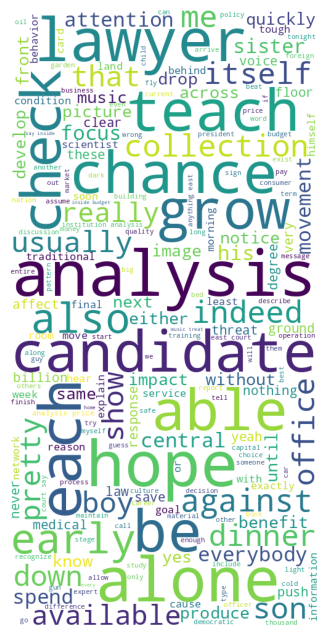

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tfidf = svm_clf.named_steps["prep"].named_transformers_["text"]
clf = svm_clf.named_steps["clf"]

features = tfidf.get_feature_names_out()
coefs = clf.coef_[0]

importance = {
    features[i]: float(abs(coefs[i]))
    for i in range(len(coefs))
}

wordcloud = WordCloud(
    background_color="white",
    width=500,
    height=1000
).generate_from_frequencies(importance)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wc-svm.png")
plt.show()

In [13]:
# Silvia k-fold
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_clf, df, df["label"], cv=k_fold)

print("Fold Accuracies:", scores)
print("Average Accuracy:", np.mean(scores))

Fold Accuracies: [0.51094891 0.50364964 0.55677656 0.49084249 0.51648352]
Average Accuracy: 0.5157402208497099


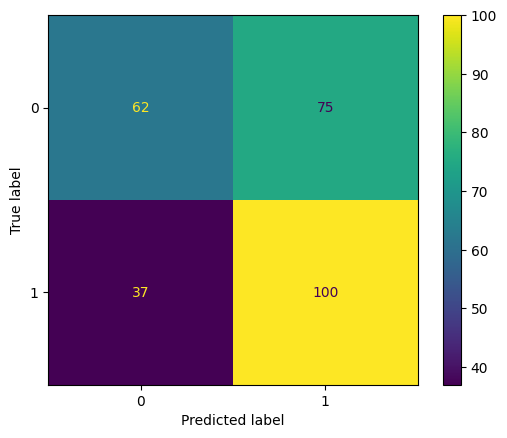

In [14]:
# Alyssa

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
# Silvia - DistilBERT

# split the data into training and testing data
from sklearn.model_selection import train_test_split

text_col = "text_content"
label_col = "label"     # 1 or 0

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df[text_col].tolist(),
    df[label_col].tolist(),
    test_size=0.2,  #20% is a test set
    random_state=42, # To keep it the same each time
    #stratify=df[label_col] #To keep the classes balanced
)

In [16]:
# Silvia - sets a fixed seed
import os
import random
import numpy as np
import torch

seed = 42
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False



In [17]:
# Silvia - Tokenize Text for DistilBERT

from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased") # Load pretrained tokenizer

#Get database size
lengths = [len(tokenizer(text, truncation=True, max_length=512)["input_ids"]) for text in train_texts]
print("Max tokens:", max(lengths))
print("Average tokens:", sum(lengths) / len(lengths))


encode_train = tokenizer(train_texts, truncation=True, padding=True, max_length=512)       # Tokenize text into subword IDs
encode_test = tokenizer(test_texts, truncation=True, padding=True, max_length=512)         # truncates texts longer than 512 tokens, pads shorter ones, and converts



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Max tokens: 512
Average tokens: 168.2644098810613


In [18]:
# Silvia - convert preprocessed data into something the model can learn from (PyTorch Dataset).

import torch

class NewDataSet(torch.utils.data.Dataset):
    def __init__(self, test_to_num, labels):  # Store the  text and label
        self.test_to_num = test_to_num
        self.labels = labels

    def __getitem__(self, index):
      item = {}

      # loop to go over all keys/ values
      for key, val in self.test_to_num.items():
          item[key] = torch.tensor(val[index]) # get the data for one text sample and turn it into a PyTorch tensor (container to store numbers)

      item["labels"] = torch.tensor(self.labels[index])   # Add the label tensor for this sample

      return item

    def __len__(self):     # get total number of samples in the dataset
        return len(self.labels)

data_train = NewDataSet(encode_train, train_labels)        # create PyTorch dataset objects for training and testing
data_test = NewDataSet(encode_test, test_labels)           # wrap the tokenized text and labels for the Trainer to use

In [19]:
# Silvia - disable wanbd
import os
os.environ["WANDB_DISABLED"] = "true"

In [20]:
# Silvia - Train DistilBERT Model

from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, AutoConfig, AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, f1_score

def compute_metrics(p):
  predictions = p.predictions.argmax(-1) # get the highest prediction
  labels = p.label_ids
  return {"accuracy": accuracy_score(labels, predictions), "f1": f1_score(labels, predictions)}



# load the pretained DistilBERT
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


# define training arguments
training_args = TrainingArguments(
    output_dir="./results",              # folder to save model outputs
    eval_strategy="epoch",               # evaluate after each epoch
    learning_rate=3e-5,                  # learning rate
    per_device_train_batch_size=8,       # batch size for training
    per_device_eval_batch_size=8,        # batch size for evaluation
    num_train_epochs=5,                  # number of epochs #5 to stop overfit
    weight_decay=0.01,                   # small regularization
    logging_dir="./logs",                # where to store logs
    logging_steps=10,
    seed = 42,

)


# create Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=data_train,
    eval_dataset=data_test,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,

)

# train the model
trainer.train()




model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-183981466.py:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.694100,0.692608,0.518248,0.681159
2,0.700100,0.693995,0.485401,0.000000
3,0.678400,0.691878,0.521898,0.679707
4,0.682000,0.678945,0.594891,0.662614
5,0.533700,0.706735,0.594891,0.645367


TrainOutput(global_step=685, training_loss=0.6683433651053993, metrics={'train_runtime': 296.0329, 'train_samples_per_second': 18.461, 'train_steps_per_second': 2.314, 'total_flos': 723934333655040.0, 'train_loss': 0.6683433651053993, 'epoch': 5.0})

In [21]:
# silvia
import numpy as np

output = trainer.predict(data_test)
preds = np.argmax(output.predictions, axis=1)

print("Accuracy:", accuracy_score(test_labels, preds))

Accuracy: 0.5948905109489051


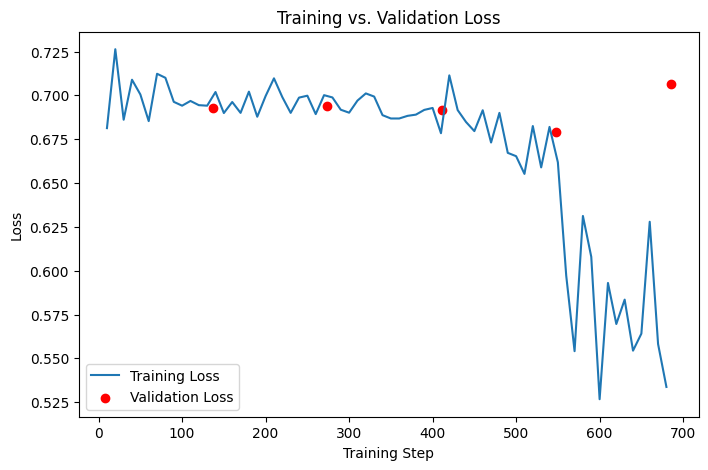

In [22]:
logs = trainer.state.log_history
train_loss = []
val_loss = []
t_steps = []
v_steps = []
eval_accuracy = []
eval_f1 = []

for entry in logs:
  if "loss" in entry:
    train_loss.append(entry["loss"])

    if "step" in entry:
      t_steps.append(entry["step"])

  if "eval_loss" in entry:
    val_loss.append(entry["eval_loss"])

    if "step" in entry:
      v_steps.append(entry["step"])

  if "eval_accuracy" in entry:
    eval_accuracy.append(entry["eval_accuracy"])

  if "eval_f1" in entry:
    eval_f1.append(entry["eval_f1"])



# print(eval_f1)

def moving_average(x, w=2):
  return np.convolve(x, np.ones(w)/w, mode='valid')

# training vs validation plot
plt.figure(figsize=(8,5))
plt.plot(t_steps, train_loss, label="Training Loss")
plt.scatter(v_steps, val_loss, color="red", label="Validation Loss")
# plt.scatter(v_steps, eval_accuracy, color="green", label="Validation Accuracy")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.savefig("training-valid-loss.png")
plt.show()


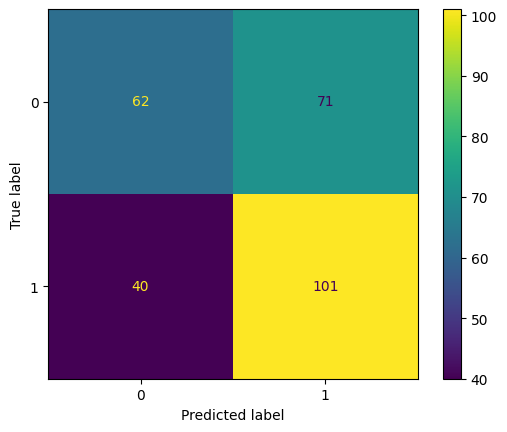

In [23]:
# Alyssa

cm = confusion_matrix(test_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [24]:
# silvia K-Fold for DistilBERT

from sklearn.model_selection import KFold
import numpy as np
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback

texts = df["text_content"].tolist()
labels = df["label"].tolist()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

fold = 1
for train_index, test_index in kf.split(texts):



    train_texts = [texts[i] for i in train_index]
    test_texts  = [texts[i] for i in test_index]
    train_labels = [labels[i] for i in train_index]
    test_labels  = [labels[i] for i in test_index]


    encode_train = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
    encode_test  = tokenizer(test_texts,  truncation=True, padding=True, max_length=512)


    data_train = NewDataSet(encode_train, train_labels)
    data_test  = NewDataSet(encode_test,  test_labels)


    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


    for param in model.distilbert.parameters():
        param.requires_grad = False


    training_args = TrainingArguments(
        output_dir=f"./results_fold{fold}",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=3e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=5,
        weight_decay=0.01,
        logging_dir=f"./logs_fold{fold}",
        logging_steps=10,
        seed=42,
    )


    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=data_train,
        eval_dataset=data_test,
        compute_metrics=compute_metrics,
        tokenizer=tokenizer,
    )


    trainer.train()


    output = trainer.predict(data_test)
    preds = np.argmax(output.predictions, axis=1)
    acc = accuracy_score(test_labels, preds)

    print(f"\nFold {fold} Accuracy:", acc)
    fold_accuracies.append(acc)

    fold += 1

print("Average Accuracy:", np.mean(fold_accuracies))



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-713366731.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.696000,0.692885,0.489051,0.588235
2,0.696600,0.693996,0.500000,0.169697
3,0.692100,0.692719,0.514599,0.561056
4,0.693200,0.693298,0.485401,0.318841
5,0.686200,0.692914,0.514599,0.486486



Fold 1 Accuracy: 0.5145985401459854


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-713366731.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.698400,0.694073,0.485401,0.625995
2,0.700700,0.694756,0.492701,0.376682
3,0.693700,0.694879,0.485401,0.560748
4,0.688900,0.695038,0.456204,0.477193
5,0.691700,0.695213,0.474453,0.529412



Fold 2 Accuracy: 0.4744525547445255


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-713366731.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.695300,0.691424,0.549451,0.690176
2,0.699200,0.692644,0.520147,0.581470
3,0.690800,0.692347,0.523810,0.598765
4,0.684400,0.693466,0.487179,0.465649
5,0.685100,0.692634,0.512821,0.572347



Fold 3 Accuracy: 0.5128205128205128


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-713366731.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.698100,0.696947,0.479853,0.648515
2,0.694400,0.694346,0.498168,0.647815
3,0.699900,0.693359,0.483516,0.624000
4,0.690700,0.692334,0.531136,0.621302
5,0.693100,0.693151,0.490842,0.623306



Fold 4 Accuracy: 0.4908424908424908


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-713366731.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.693800,0.699836,0.472527,0.640000
2,0.694100,0.696785,0.468864,0.634761
3,0.697800,0.695440,0.476190,0.620690
4,0.686800,0.694616,0.483516,0.588921
5,0.689900,0.696191,0.472527,0.623037



Fold 5 Accuracy: 0.4725274725274725
Average Accuracy: 0.49304831421619744
